In [1]:
import nltk # underlying library NLP tools
from nltk.tokenize import word_tokenize
import pandas as pd # for data handling
import docx2txt # for pulling data from a word doc
from textblob import TextBlob # fior sentiment analysis
import matplotlib.pyplot as plt # visualization

Activity 1 - summarise a news article
- 

In [2]:
ourfile=docx2txt.process('Horseracing.docx')

In [3]:
tokens=word_tokenize(ourfile)
tokens

['Thousands',
 'of',
 'racehorses',
 'are',
 'being',
 'sent',
 'to',
 'slaughterhouses',
 'in',
 'Britain',
 'and',
 'Ireland',
 ',',
 'a',
 'BBC',
 'Panorama',
 'investigation',
 'has',
 'found',
 '.',
 'Some',
 'of',
 'the',
 'slaughtered',
 'animals',
 'were',
 'once',
 'owned',
 'and',
 'trained',
 'by',
 'some',
 'of',
 'the',
 'biggest',
 'names',
 'in',
 'racing',
 '.',
 'Covert',
 'recording',
 'also',
 'showed',
 'how',
 'rules',
 'designed',
 'to',
 'protect',
 'horses',
 'from',
 'a',
 'cruel',
 'death',
 'appear',
 'to',
 'be',
 'regularly',
 'ignored',
 'at',
 'one',
 'of',
 'the',
 'UK',
 "'s",
 'biggest',
 'abattoirs',
 '.',
 'The',
 'abattoir',
 'told',
 'the',
 'BBC',
 'it',
 'did',
 'not',
 'accept',
 'any',
 'form',
 'of',
 'animal',
 'abuse',
 '.',
 'One',
 'expert',
 'described',
 'the',
 'covert',
 'footage',
 ',',
 'from',
 'cameras',
 'installed',
 'by',
 'the',
 'campaign',
 'group',
 'Animal',
 'Aid',
 ',',
 'as',
 'evidence',
 'of',
 'clear',
 'breaches',
 '

In [10]:
tokens_lower=(token.lower() for token in tokens)

In [11]:
tokens_lower

<generator object <genexpr> at 0x000002884AC10D60>

In [11]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [12]:
len(tokens_lower)

TypeError: object of type 'generator' has no len()

In [13]:
# remove punctuation
clean_tokens_lower=[word for word in tokens_lower if word.isalpha()]

In [14]:
# remove stopwords
from nltk.corpus import stopwords

In [15]:
stop_words=stopwords.words('english')

In [16]:
clean_tokens_lower_without_stop=[word for word in clean_tokens_lower if not word in stop_words]

In [17]:
len(clean_tokens_lower_without_stop)

513

In [18]:
freqdist1=nltk.FreqDist(tokens_lower)

In [19]:
word_freq1=dict((word,freq) for word,freq in freqdist1.items() if not word.isdigit())

In [20]:
sorted_word_freq1=sorted(word_freq1.items(), key=lambda x:x[1], reverse=True)

In [21]:
sorted_word_freq1

[]

In [22]:
# rename the variable
new_words=clean_tokens_lower_without_stop

In [23]:
freqdist2=nltk.FreqDist(new_words)

In [24]:
word_freq2=dict((word,freq) for word,freq in freqdist2.items() if not word.isdigit())

In [25]:
sorted_word_freq2=sorted(word_freq2.items(), key=lambda x:x[1], reverse=True)
sorted_word_freq2

[('said', 18),
 ('horses', 14),
 ('racing', 13),
 ('horse', 11),
 ('ireland', 8),
 ('animal', 8),
 ('footage', 8),
 ('panorama', 6),
 ('animals', 6),
 ('aid', 6),
 ('abattoir', 5),
 ('cameras', 5),
 ('regulations', 5),
 ('elliott', 5),
 ('killed', 5),
 ('racehorses', 4),
 ('sent', 4),
 ('bbc', 4),
 ('trained', 4),
 ('also', 4),
 ('one', 4),
 ('welfare', 4),
 ('going', 4),
 ('slaughtered', 3),
 ('covert', 3),
 ('rules', 3),
 ('death', 3),
 ('told', 3),
 ('three', 3),
 ('industry', 3),
 ('recorded', 3),
 ('shot', 3),
 ('care', 3),
 ('euthanised', 3),
 ('prof', 3),
 ('mills', 3),
 ('got', 3),
 ('thousands', 2),
 ('slaughterhouses', 2),
 ('britain', 2),
 ('biggest', 2),
 ('showed', 2),
 ('designed', 2),
 ('protect', 2),
 ('appear', 2),
 ('abattoirs', 2),
 ('accept', 2),
 ('form', 2),
 ('abuse', 2),
 ('expert', 2),
 ('clear', 2),
 ('breaches', 2),
 ('gordon', 2),
 ('fate', 2),
 ('former', 2),
 ('end', 2),
 ('set', 2),
 ('drury', 2),
 ('sons', 2),
 ('young', 2),
 ('dene', 2),
 ('stansall', 2

### convert the list into an nltk text type

In [26]:
from nltk.text import Text

In [27]:
nltktext=Text(new_words)

In [28]:
type(new_words)

list

In [29]:
type(nltktext)

nltk.text.Text

In [30]:
#collocations - words that appear next to each other frequently
nltktext.collocations()

animal aid; accept form; dene stansall; designed protect; drury sons;
four days; travelling miles; rules designed; former racehorses; gordon
elliott; prof mills; animal abuse; britain ireland; form animal;
racehorses slaughtered; told panorama; footage recorded; aid cameras;
horses industry; horses shot


In [31]:
# concordance - fragments containing key words - indexed - text around that word
nltktext.concordance('protect')

Displaying 2 of 2 matches:
ecording also showed rules designed protect horses cruel death appear regularly
ured appear breaches rules designed protect animals unnecessary cruelty regulat


In [33]:
nltktext.concordance('elliott')

Displaying 5 of 5 matches:
february picture top trainer gordon elliott sitting dead horse sent shockwaves 
sent shockwaves world racing beyond elliott trained three winners grand nationa
ousands pounds three trained gordon elliott stables county meath ireland told p
 racing due injury said care killed elliott said two horses sent horse dealer r
ime learned fate panorama contacted elliott said ensured appropriate proper tre


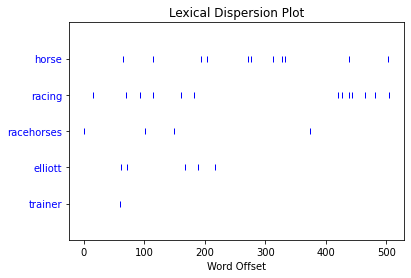

In [34]:
nltktext.dispersion_plot(['horse','racing','racehorses','elliott','trainer'])

# ACTIVITY 2 - clothing reviews and sentiment

In [35]:
clothingdf=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [36]:
clothingdf.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [37]:
clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [38]:
clothingdf['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 23486, dtype: object

In [39]:
pd.set_option("display.max_colwidth", None) # see full text

In [40]:
clothingdf['Review Text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                             Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone w

In [41]:
clothingdf['Rating'].unique()

array([4, 5, 3, 2, 1], dtype=int64)

In [45]:
TextBlob('this is the worst place i hate it').sentiment # Negative

Sentiment(polarity=-0.9, subjectivity=0.95)

In [46]:
TextBlob('this is the best place i love it').sentiment # Positive

Sentiment(polarity=0.75, subjectivity=0.44999999999999996)

In [47]:
TextBlob('not bad could be better').sentiment # Neutral

Sentiment(polarity=0.42499999999999993, subjectivity=0.5833333333333333)

## clean our data for department, review analysis

In [49]:
# remove nulls from department and review text
clothingdf['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [50]:
clothingdf['Review Text'].unique()

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "This fit well, but the top was very see through. this never would have worked for me. i

In [51]:
clothingdf.dropna(subset=['Review Text','Department Name'], inplace=True)

In [52]:
clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22628 non-null  int64 
 1   Clothing ID              22628 non-null  int64 
 2   Age                      22628 non-null  int64 
 3   Title                    19662 non-null  object
 4   Review Text              22628 non-null  object
 5   Rating                   22628 non-null  int64 
 6   Recommended IND          22628 non-null  int64 
 7   Positive Feedback Count  22628 non-null  int64 
 8   Division Name            22628 non-null  object
 9   Department Name          22628 non-null  object
 10  Class Name               22628 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


In [48]:
from nltk.stem import WordNetLemmatizer

In [53]:
def cleaning(data):
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'","").lower())
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    #joining
    return " ".join(text_cleaned)

In [54]:
clothingdf['Review Text'] = clothingdf['Review Text'].apply(cleaning)
clothingdf['Review Text']

0                                                                                                                                                                                                                                                                       absolutely wonderful silky sexy comfortable
1                                                                                                                              love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2        high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3                                                                           

### sentiment analysis

In [55]:
clothingdf['sentiment_score']=clothingdf['Review Text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [56]:
clothingdf['subjectivity_score']=clothingdf['Review Text'].apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [57]:
clothingdf.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment_score,subjectivity_score
0,0,767,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333
1,1,1080,34,NaN,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,5,1,4,General,Dresses,Dresses,0.318750,0.725000
2,2,1077,60,Some major design flaws,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c,3,0,0,General,Dresses,Dresses,0.062409,0.338526
3,3,1049,50,My favorite buy!,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,5,1,0,General Petite,Bottoms,Pants,0.500000,0.625000
4,4,847,47,Flattering shirt,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,5,1,6,General,Tops,Blouses,0.458333,0.658333


In [58]:
clothingdf.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,sentiment_score,subjectivity_score
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,11737.272097,919.695908,43.282880,4.183092,0.818764,2.631784,0.254708,0.562496
std,6781.574232,201.683804,12.328176,1.115911,0.385222,5.787520,0.173078,0.129355
min,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000,-0.800000,0.000000
25%,5868.750000,861.000000,34.000000,4.000000,1.000000,0.000000,0.145566,0.482060
50%,11727.500000,936.000000,41.000000,5.000000,1.000000,1.000000,0.250000,0.558333
75%,17617.250000,1078.000000,52.000000,5.000000,1.000000,3.000000,0.358333,0.637500
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000,1.000000,1.000000


In [60]:
dep_group_by=clothingdf.groupby(['Department Name']).agg({'sentiment_score':'mean'})

In [62]:
dep_group_by

,sentiment_score
Department Name,
Bottoms,0.254660
Dresses,0.256695
Intimate,0.253195
Jackets,0.241503
Tops,0.255577
Trend,0.211939


# Example SpaCy - demonstration Trump tweets

In [66]:
import spacy

In [ ]:
nlp=spacy.load('en_core_web_trf')

In [64]:
tweets=pd.read_csv('ever_trump.csv')

In [65]:
tweets['created_at'].min()

'01-01-2015 07:02:39'

In [ ]:
tokens=nlp(''.join(str(tweets.text.tolist())))

In [ ]:
len(tokens)